In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np, pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

data2015 = pd.read_csv("mixed_cities/2015H1.csv", skiprows=4, parse_dates=["Date"], index_col="Date")
data2016 = pd.read_csv("mixed_cities/2016H1.csv", skiprows=4, parse_dates=["Date"], index_col="Date")
data2017 = pd.read_csv("mixed_cities/2017H1.csv", skiprows=4, parse_dates=["Date"], index_col="Date")
data2018 = pd.read_csv("mixed_cities/2018H1.csv", skiprows=4, parse_dates=["Date"], index_col="Date")

data2019Q1 = pd.read_csv("mixed_cities/2019Q1.csv", skiprows=4, parse_dates=["Date"], index_col="Date")
data2019Q2 = pd.read_csv("mixed_cities/2019Q2.csv", skiprows=4, parse_dates=["Date"], index_col="Date")
data2019Q3 = pd.read_csv("mixed_cities/2019Q3.csv", skiprows=4, parse_dates=["Date"], index_col="Date")
data2019Q4 = pd.read_csv("mixed_cities/2019Q4.csv", skiprows=4, parse_dates=["Date"], index_col="Date")

data2020Q1 = pd.read_csv("mixed_cities/2020Q1.csv", skiprows=4, parse_dates=["Date"], index_col="Date")
data2020Q2 = pd.read_csv("mixed_cities/2020Q2.csv", skiprows=4, parse_dates=["Date"], index_col="Date")
data2020Q3 = pd.read_csv("mixed_cities/2020Q3.csv", skiprows=4, parse_dates=["Date"], index_col="Date")
data2020Q4 = pd.read_csv("mixed_cities/2020Q4.csv", skiprows=4, parse_dates=["Date"], index_col="Date")

data2021Q1 = pd.read_csv("mixed_cities/2021Q1.csv", parse_dates=["Date"], index_col="Date")
data2021Q2 = pd.read_csv("mixed_cities/2021Q2.csv", parse_dates=["Date"], index_col="Date")
data2021Q3 = pd.read_csv("mixed_cities/2021Q3.csv", parse_dates=["Date"], index_col="Date")
data2021Q4 = pd.read_csv("mixed_cities/2021Q4.csv", parse_dates=["Date"], index_col="Date")

data2022 = pd.read_csv("mixed_cities/2022.csv", parse_dates=["Date"], index_col="Date")

all2019 = [data2019Q1, data2019Q2, data2019Q3, data2019Q4]
all2020 = [data2020Q1, data2020Q2, data2020Q3, data2020Q4]
all2021 = [data2021Q1, data2021Q2, data2021Q3, data2021Q4]

data2019 = pd.concat(all2019)
data2020 = pd.concat(all2020)
data2021 = pd.concat(all2021)


In [33]:
cleaned2015 = data2015.pivot_table(index=['Date', 'Country', 'City'], 
                     columns='Specie', 
                     values='median', 
                     fill_value='',
                     aggfunc=np.mean).rename_axis(None, axis=1).reset_index()
cleaned2016 = data2016.pivot_table(index=['Date', 'Country', 'City'], 
                     columns='Specie', 
                     values='median', 
                     fill_value='',
                     aggfunc=np.mean).rename_axis(None, axis=1).reset_index()
cleaned2017 = data2017.pivot_table(index=['Date', 'Country', 'City'], 
                     columns='Specie', 
                     values='median', 
                     fill_value='',
                     aggfunc=np.mean).rename_axis(None, axis=1).reset_index()
cleaned2018 = data2018.pivot_table(index=['Date', 'Country', 'City'], 
                     columns='Specie', 
                     values='median', 
                     fill_value='',
                     aggfunc=np.mean).rename_axis(None, axis=1).reset_index()
cleaned2019 = data2019.pivot_table(index=['Date', 'Country', 'City'], 
                     columns='Specie', 
                     values='median', 
                     fill_value='',
                     aggfunc=np.mean).rename_axis(None, axis=1).reset_index()
cleaned2020 = data2020.pivot_table(index=['Date', 'Country', 'City'], 
                     columns='Specie', 
                     values='median', 
                     fill_value='',
                     aggfunc=np.mean).rename_axis(None, axis=1).reset_index()
cleaned2021 = data2021.pivot_table(index=['Date', 'Country', 'City'], 
                     columns='Specie', 
                     values='median', 
                     fill_value='',
                     aggfunc=np.mean).rename_axis(None, axis=1).reset_index()
cleaned2022 = data2022.pivot_table(index=['Date', 'Country', 'City'], 
                     columns='Specie', 
                     values='median', 
                     fill_value='',
                     aggfunc=np.mean).rename_axis(None, axis=1).reset_index()
cleaned2015 = cleaned2015.set_index('Date')
cleaned2016 = cleaned2016.set_index('Date')
cleaned2017 = cleaned2017.set_index('Date')
cleaned2018 = cleaned2018.set_index('Date')
cleaned2019 = cleaned2019.set_index('Date')
cleaned2020 = cleaned2020.set_index('Date')
cleaned2021 = cleaned2021.set_index('Date')
cleaned2022 = cleaned2022.set_index('Date')

In [34]:
Delhi_Data = pd.concat([cleaned2015[cleaned2015['City']=='Delhi'], cleaned2016[cleaned2016['City']=='Delhi'],
                     cleaned2017[cleaned2017['City']=='Delhi'], cleaned2018[cleaned2018['City']=='Delhi'], 
                     cleaned2019[cleaned2019['City']=='Delhi'], cleaned2020[cleaned2020['City']=='Delhi'],
                     cleaned2021[cleaned2021['City']=='Delhi'], cleaned2022[cleaned2022['City']=='Delhi']])
Delhi_Data = Delhi_Data.replace(r'^\s*$', np.nan, regex=True)

Delhi_Data.isna().sum()

Country             0
City                0
aqi              1921
co                  0
mepaqi           1921
neph             1921
no2                 0
o3                  0
pm10                3
pm25                3
psi              1921
so2                 0
uvi              1921
pol              1921
d                1921
humidity          702
pm1              1921
pressure          702
temperature       702
wd                723
wind-speed        771
precipitation    1660
wind-gust        1529
dew               763
wind gust        1908
wind speed       1830
dtype: int64

In [35]:
Beijing_Data = pd.concat([cleaned2015[cleaned2015['City']=='Beijing'], cleaned2016[cleaned2016['City']=='Beijing'],
                     cleaned2017[cleaned2017['City']=='Beijing'], cleaned2018[cleaned2018['City']=='Beijing'], 
                     cleaned2019[cleaned2019['City']=='Beijing'], cleaned2020[cleaned2020['City']=='Beijing'],
                     cleaned2021[cleaned2021['City']=='Beijing'], cleaned2022[cleaned2022['City']=='Beijing']])
Beijing_Data = Beijing_Data.replace(r'^\s*$', np.nan, regex=True)

Beijing_Data.isna().sum()

Country             0
City                0
aqi              1701
co                  0
mepaqi           1917
neph             1917
no2                 0
o3                  5
pm10                4
pm25                0
psi              1917
so2                 0
uvi              1917
pol              1649
d                1867
humidity          719
pm1              1917
pressure          719
temperature       719
wd               1867
wind-speed        790
precipitation    1842
wind-gust        1471
dew               825
wind gust        1885
wind speed       1833
dtype: int64

In [38]:
#KEEP ONLY NEEDED COLUMNS AND TRANSFORM THE VALUES TO NUMERIC
cols=['pm25', 'pm10', 'no2', 'o3', 'so2']

Beijing_Data = Beijing_Data.loc[:, Beijing_Data.columns.intersection(cols)]
Delhi_Data = Delhi_Data.loc[:, Delhi_Data.columns.intersection(cols)]

#make columns numeric
Beijing_Data = Beijing_Data.apply(pd.to_numeric, errors='coerce')
Delhi_Data = Delhi_Data.apply(pd.to_numeric, errors='coerce')

#remove duplicated values with the same datetime index
Beijing_Data = Beijing_Data.iloc[1: , :]
Beijing_Data = Beijing_Data[~Beijing_Data.index.duplicated(keep='first')]

Delhi_Data = Delhi_Data[~Delhi_Data.index.duplicated(keep='first')]

#fill nan values with forward and backward filling
Beijing_Data = Beijing_Data.fillna(method='ffill')
Beijing_Data = Beijing_Data.fillna(method='bfill')

Delhi_Data = Delhi_Data.fillna(method='ffill')
Delhi_Data = Delhi_Data.fillna(method='bfill')

## Add weather data to the dataframes for the multivariate models

In [54]:
#DELHI WEATHER DATA
part1 = pd.read_csv('Delhi 2014-12-29 to 2015-12-24.csv', parse_dates=["datetime"], index_col="datetime")
part2 = pd.read_csv('Delhi 2015-12-25 to 2018-09-19.csv', parse_dates=["datetime"], index_col="datetime")
part3 = pd.read_csv('Delhi 2018-09-20 to 2021-06-15.csv', parse_dates=["datetime"], index_col="datetime")
part4 = pd.read_csv('Delhi 2021-06-16 to 2022-03-19.csv', parse_dates=["datetime"], index_col="datetime")

all_weather_cond = [part1, part2, part3, part4]
Delhi_weather = pd.concat(all_weather_cond)

cols=['temp', 'dew', 'humidity', 'windspeed', 'winddir', 'datetime']

Delhi_weather = Delhi_weather.loc[:, Delhi_weather.columns.intersection(cols)]

Delhi_weather = Delhi_weather.fillna(method="bfill")

Delhi_merged = Delhi_Data.merge(Delhi_weather, left_index=True, right_index=True, how='inner')

Delhi_merged

,no2,o3,pm10,pm25,so2,temp,dew,humidity,windspeed,winddir
2014-12-29,36.2,3.2,218.0,307.0,4.2,10.8,7.5,83.9,11.2,92.0
2014-12-30,36.8,4.8,330.0,367.0,5.8,10.0,7.6,87.4,11.2,173.6
2014-12-31,28.7,7.8,137.0,202.0,6.3,12.0,8.4,80.8,18.4,91.7
2015-01-01,66.5,5.2,230.0,382.0,9.9,14.3,9.7,77.1,9.4,99.5
2015-01-02,33.9,6.0,81.0,172.0,4.2,14.4,12.0,86.6,11.2,80.3
...,...,...,...,...,...,...,...,...,...,...
2022-03-15,16.1,7.5,142.0,176.0,6.8,26.9,19.8,69.5,18.4,192.6
2022-03-16,13.3,8.3,130.0,165.0,6.4,27.6,19.4,65.1,24.4,273.0
2022-03-17,16.0,8.6,144.0,179.0,7.9,27.7,20.0,66.2,9.4,175.5
2022-03-18,9.8,11.6,138.0,185.0,6.1,28.2,21.8,70.7,14.5,127.3


In [50]:
#Beijing weather data
part1 = pd.read_csv('Beijing 2014-12-29 to 2017-09-23.csv', parse_dates=["datetime"], index_col="datetime")
part2 = pd.read_csv('Beijing 2017-09-23 to 2020-06-18.csv', parse_dates=["datetime"], index_col="datetime")
part3 = pd.read_csv('Beijing 2020-06-19 to 2022-03-19.csv', parse_dates=["datetime"], index_col="datetime")

all_weather_cond = [part1, part2, part3]
Beijing_weather = pd.concat(all_weather_cond)

cols=['temp', 'dew', 'humidity', 'windspeed', 'winddir', 'datetime']

Beijing_weather = Beijing_weather.loc[:, Beijing_weather.columns.intersection(cols)]

Beijing_weather = Beijing_weather.fillna(method="bfill")

Beijing_weather = Beijing_weather[~Beijing_weather.index.duplicated(keep='first')]

Beijing_merged = Beijing_Data.merge(Beijing_weather, left_index=True, right_index=True, how='inner')

Beijing_merged

,no2,o3,pm10,pm25,so2,temp,dew,humidity,windspeed,winddir
2014-12-30,31.1,9.0,61.0,90.0,14.2,2.0,-13.7,32.0,36.0,165.3
2014-12-31,6.9,21.4,44.0,34.0,4.3,-1.9,-22.0,20.5,72.0,332.2
2015-01-01,25.6,10.6,66.0,155.0,15.2,-3.1,-21.4,24.2,18.0,221.5
2015-01-02,32.0,6.5,74.0,154.0,16.8,-0.8,-17.6,28.1,18.0,160.3
2015-01-03,46.7,3.3,125.0,224.0,40.1,-3.1,-13.7,45.6,7.2,132.3
...,...,...,...,...,...,...,...,...,...,...
2022-03-15,11.5,24.0,65.0,124.0,1.1,8.9,-0.9,52.4,21.6,120.4
2022-03-16,10.6,20.8,77.0,127.0,1.1,9.8,0.9,54.0,21.6,133.2
2022-03-17,8.7,20.8,37.0,55.0,1.6,1.4,-5.4,64.7,14.4,154.4
2022-03-18,12.8,10.6,52.0,129.0,1.6,-0.8,-2.1,90.6,10.8,155.3


In [55]:
#scale data
scaler = MinMaxScaler()
scaled_Beijing = scaler.fit_transform(Beijing_merged)
scaled_Delhi = scaler.fit_transform(Delhi_merged)

#store scaled data to a dataframe object

#BEIJING
scaled_Beijing = pd.DataFrame(scaled_Beijing, columns = ['no2', 'o3', 'pm10', 'pm25', 'so2', 'temp',
                                                         'dew', 'humidity', 'windspeed', 'winddir'])

scaled_Beijing.index = Beijing_merged.index

#DELHI
scaled_Delhi = pd.DataFrame(scaled_Delhi, columns = ['no2', 'o3', 'pm10', 'pm25', 'so2', 'temp',
                                                         'dew', 'humidity', 'windspeed', 'winddir'])

scaled_Delhi.index = Delhi_merged.index

In [ ]:
scaled_Beijing

In [ ]:
scaled_Delhi

In [41]:
#save data to csv files
scaled_Beijing.to_csv('Beijing_data.csv')
scaled_Delhi.to_csv('Delhi_data.csv')

## Visualize data (by year, month and day)

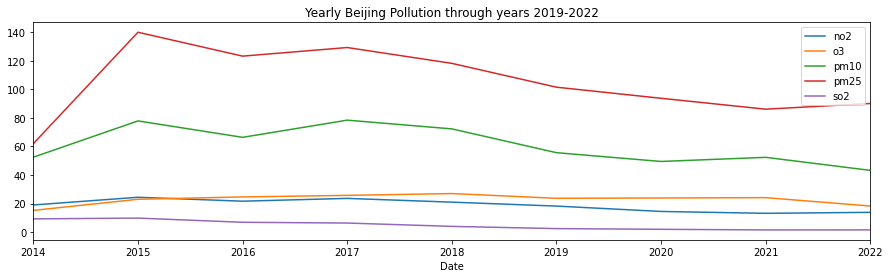

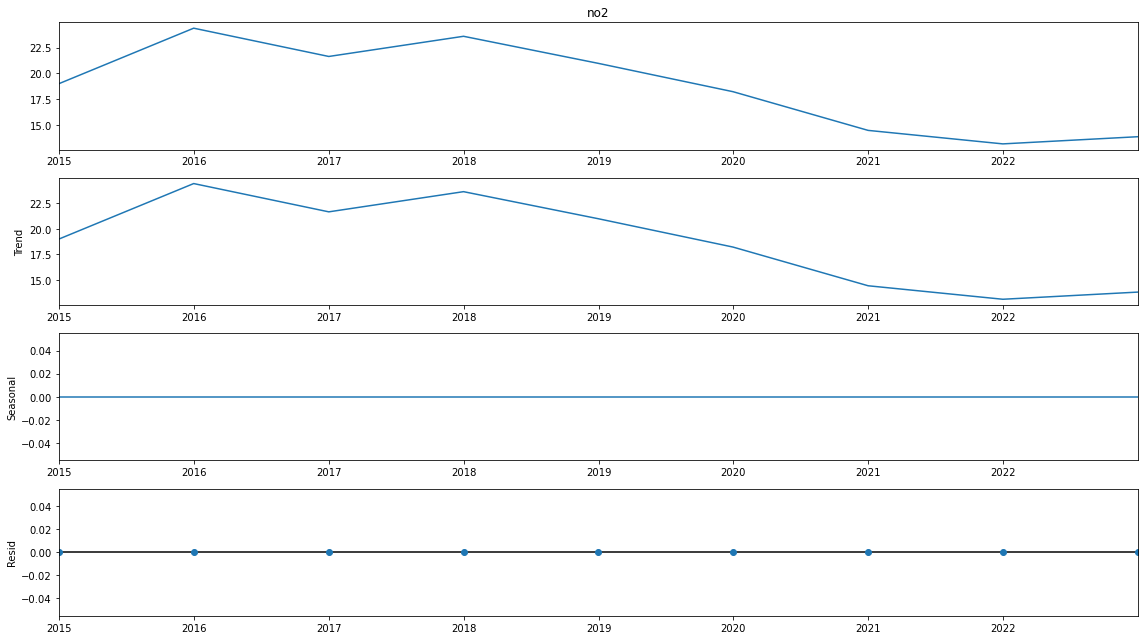

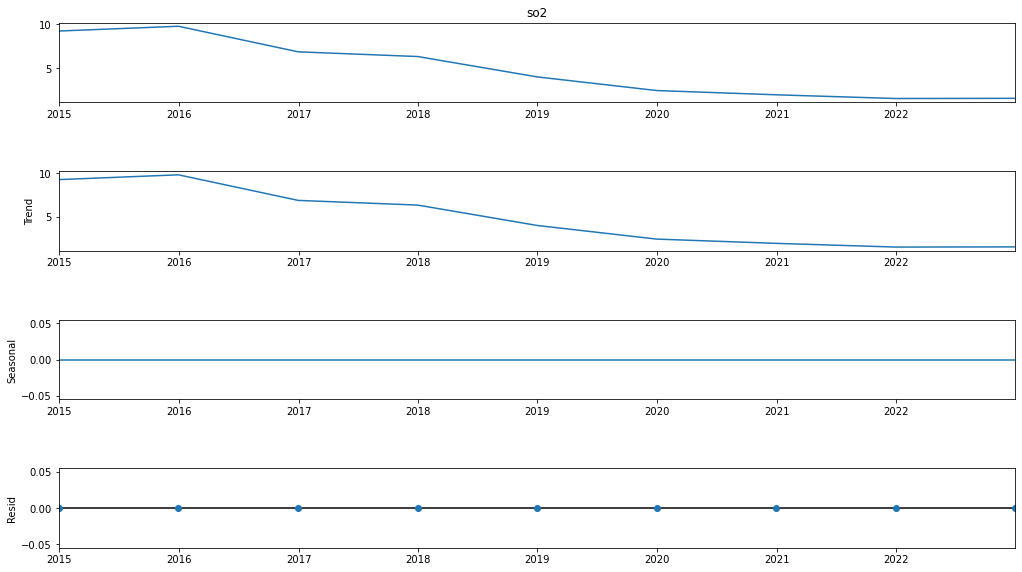

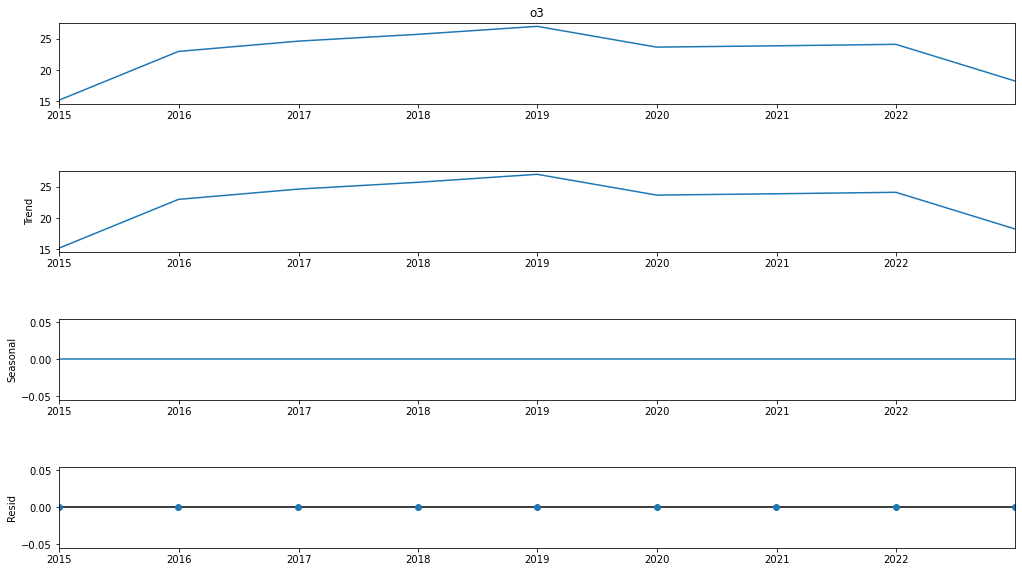

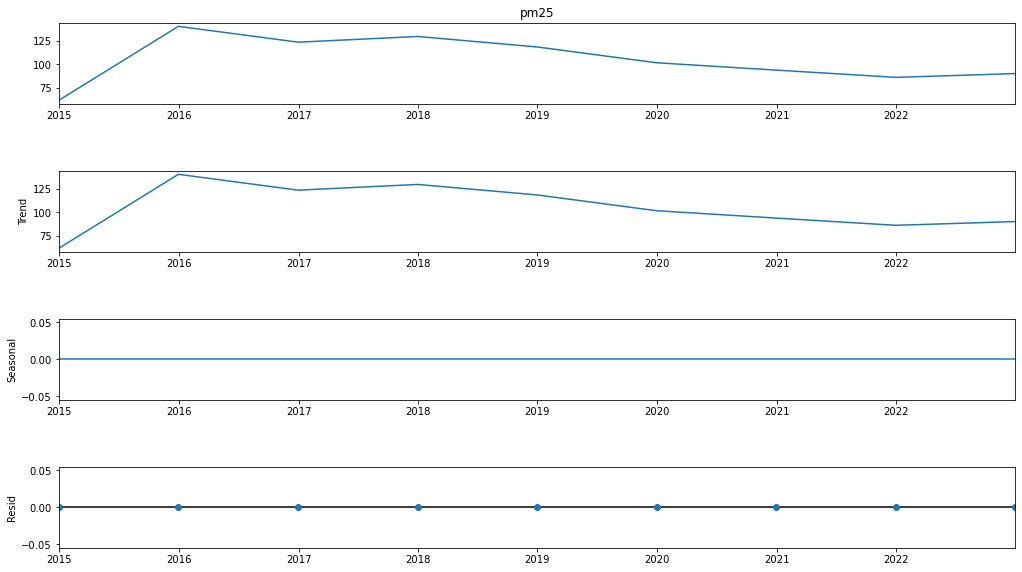

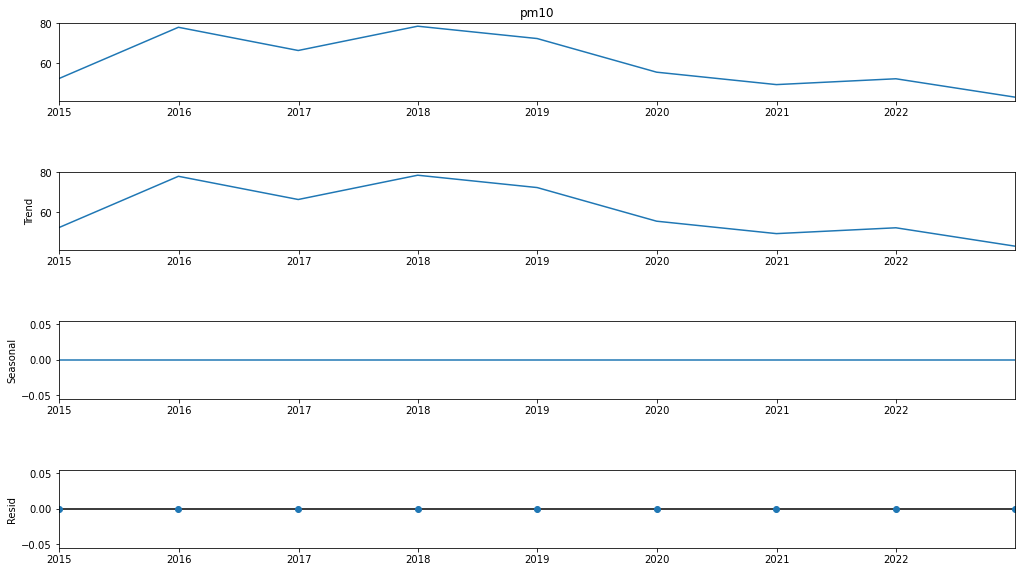

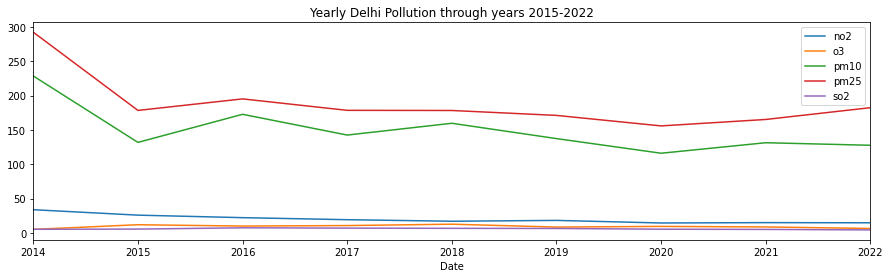

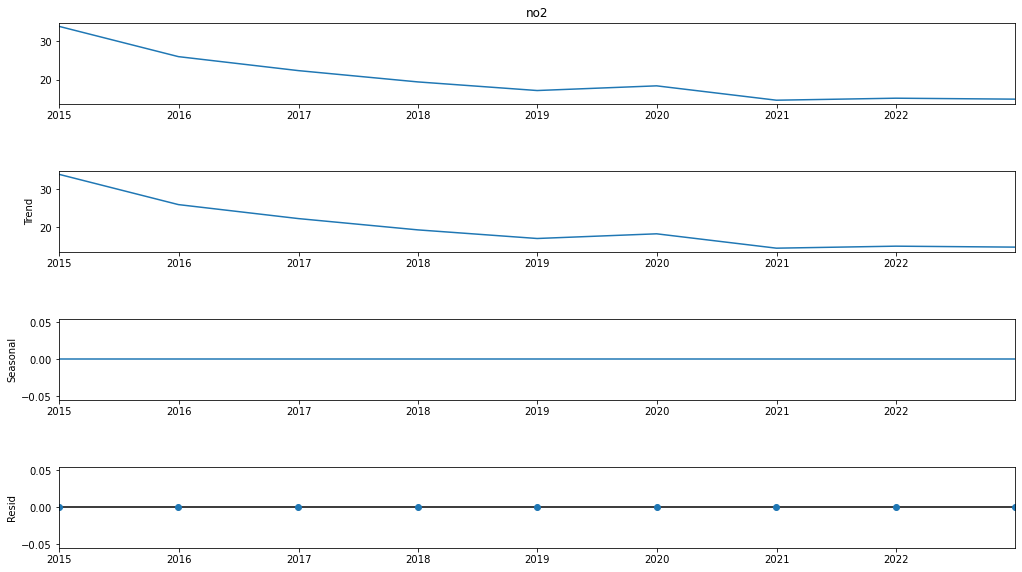

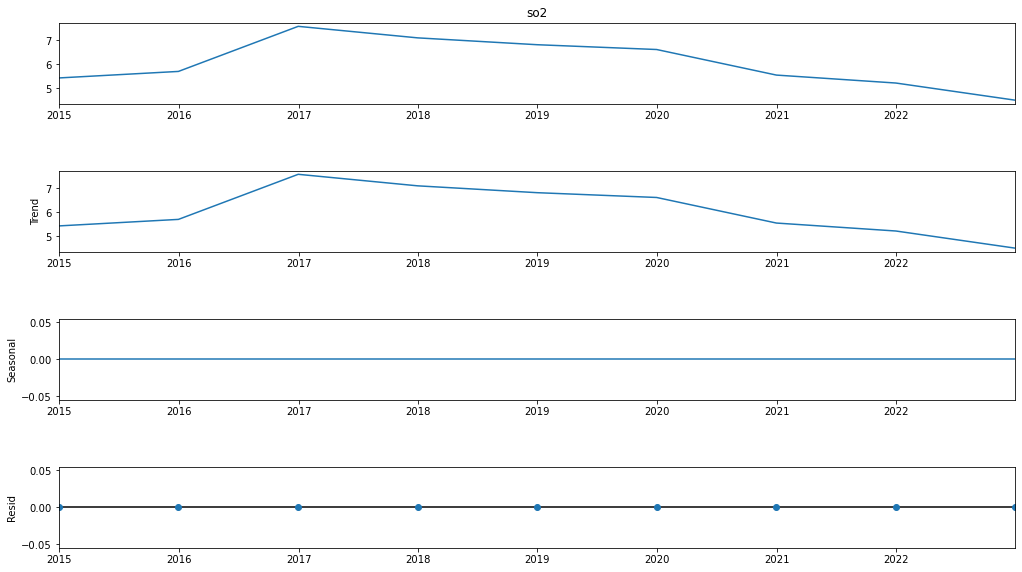

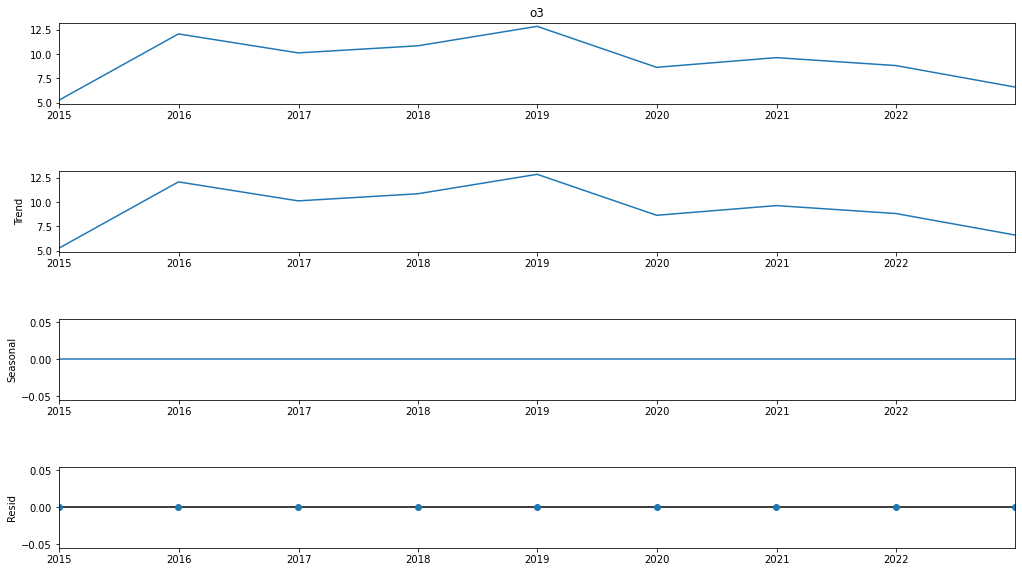

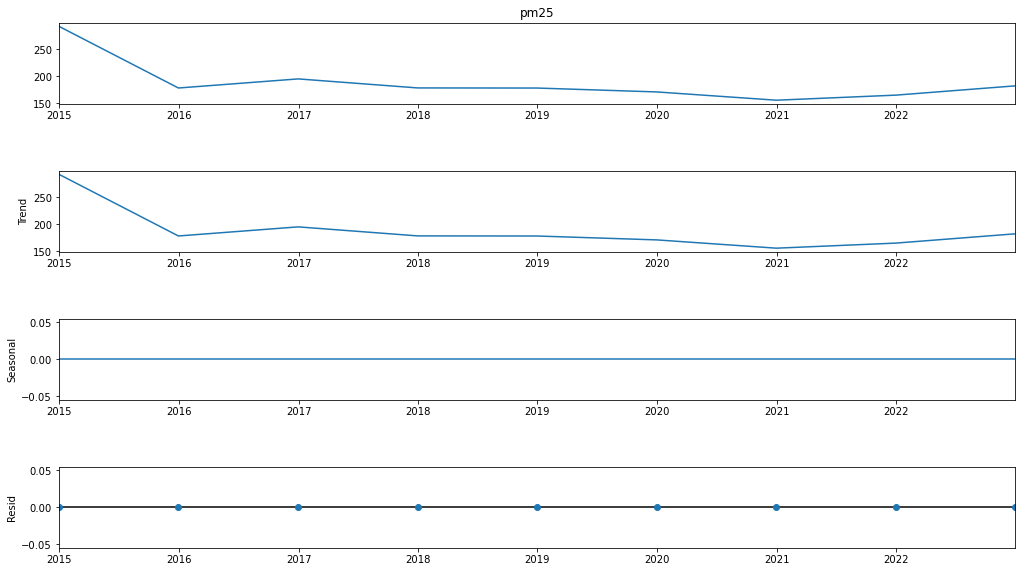

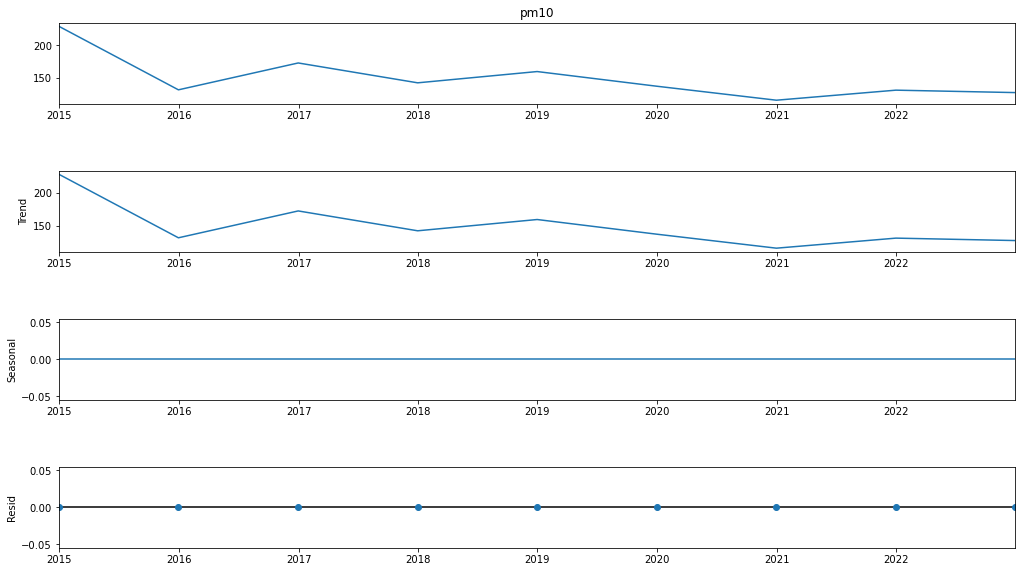

In [57]:
#Resampling the data creates nan values, I fill them with backward filling

Beijing_Data.resample("1y").mean().plot(figsize=(15,4), title="Yearly Beijing Pollution through years 2019-2022")

## Seasonality of yearly resampled data

#Beijing
model = seasonal_decompose((Beijing_Data.resample('1y').mean().bfill())["no2"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Beijing_Data.resample('1y').mean().bfill())["so2"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Beijing_Data.resample('1y').mean().bfill())["o3"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Beijing_Data.resample('1y').mean().bfill())["pm25"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Beijing_Data.resample('1y').mean().bfill())["pm10"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()


#Delhi
Delhi_Data.resample("1y").mean().plot(figsize=(15,4), title="Yearly Delhi Pollution through years 2015-2022")

model = seasonal_decompose((Delhi_Data.resample('1y').mean().bfill())["no2"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Delhi_Data.resample('1y').mean().bfill())["so2"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Delhi_Data.resample('1y').mean().bfill())["o3"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Delhi_Data.resample('1y').mean().bfill())["pm25"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Delhi_Data.resample('1y').mean().bfill())["pm10"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

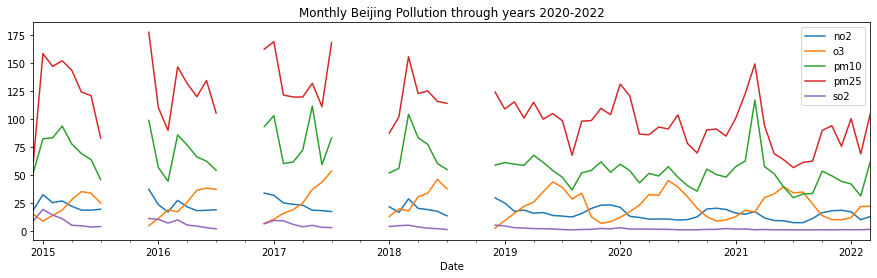

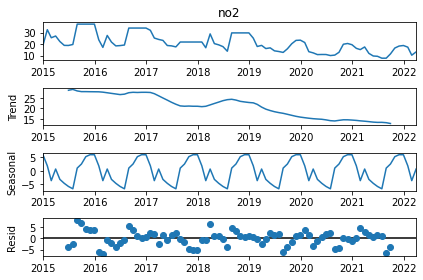

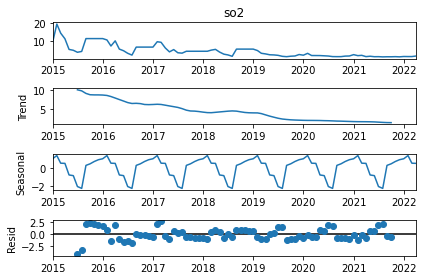

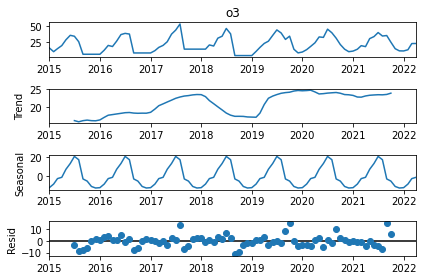

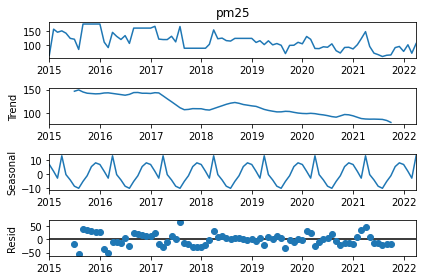

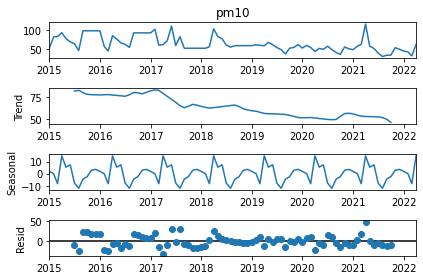

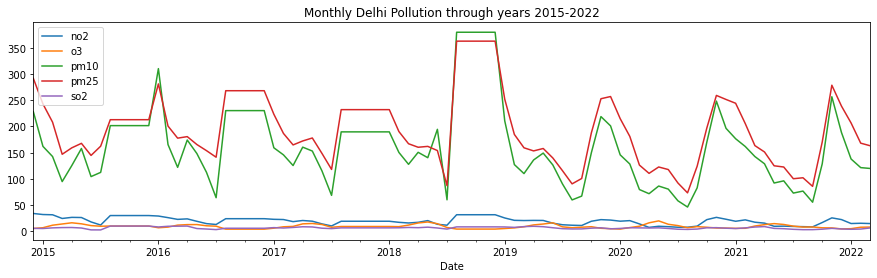

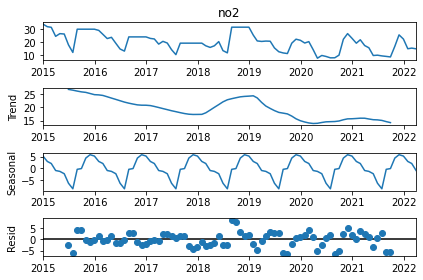

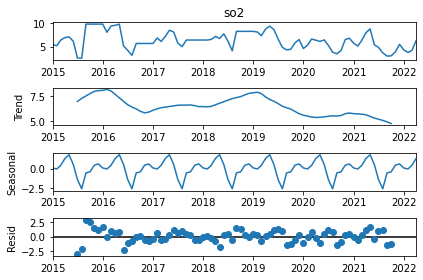

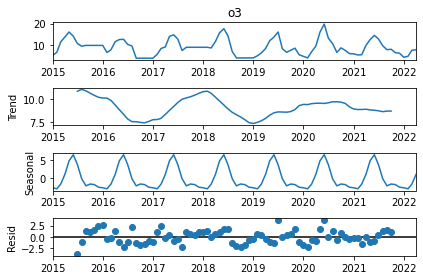

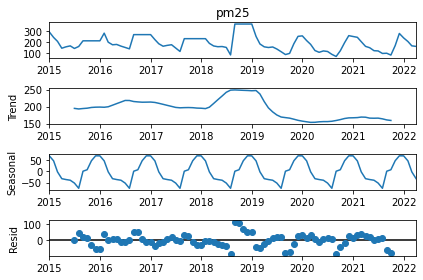

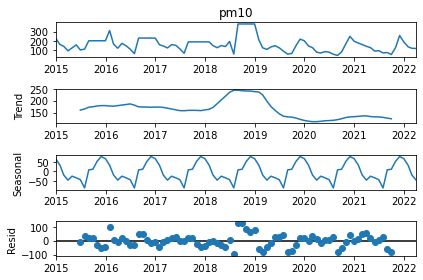

In [43]:
## Seasonality of monthly resampled data
Beijing_Data.resample("1m").mean().plot(figsize=(15,4), title="Monthly Beijing Pollution through years 2020-2022")

model = seasonal_decompose((Beijing_Data.resample('1m').mean().bfill())["no2"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Beijing_Data.resample('1m').mean().bfill())["so2"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Beijing_Data.resample('1m').mean().bfill())["o3"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Beijing_Data.resample('1m').mean().bfill())["pm25"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Beijing_Data.resample('1m').mean().bfill())["pm10"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

Delhi_Data.resample("1m").mean().bfill().plot(figsize=(15,4), title="Monthly Delhi Pollution through years 2015-2022")

model = seasonal_decompose((Delhi_Data.resample('1m').mean().bfill())["no2"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Delhi_Data.resample('1m').mean().bfill())["so2"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Delhi_Data.resample('1m').mean().bfill())["o3"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Delhi_Data.resample('1m').mean().bfill())["pm25"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Delhi_Data.resample('1m').mean().bfill())["pm10"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

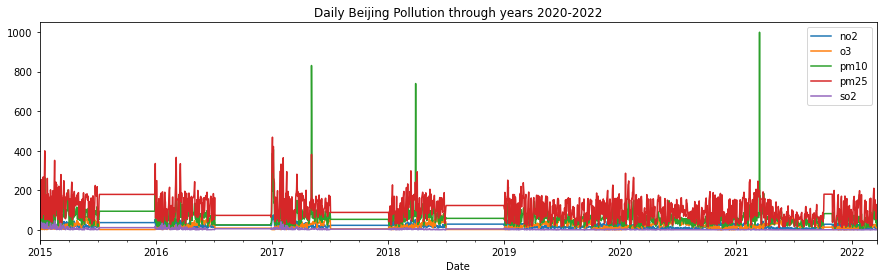

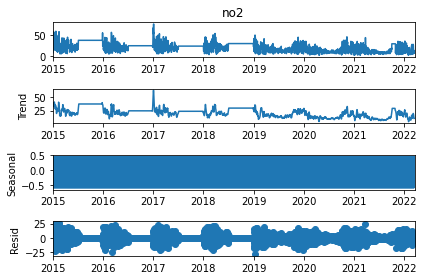

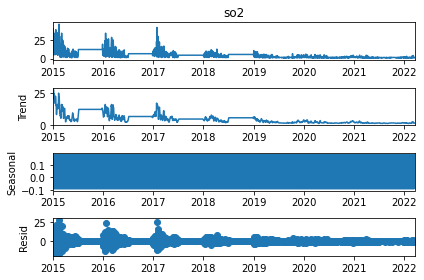

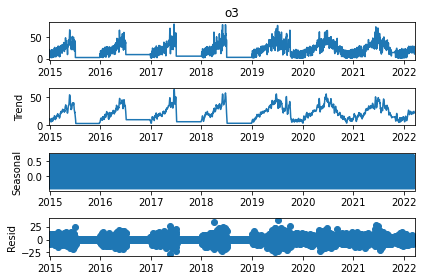

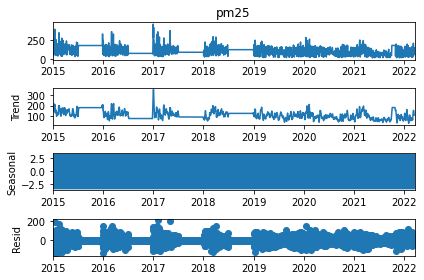

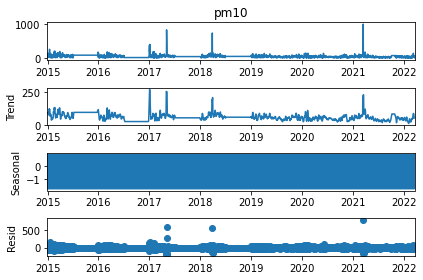

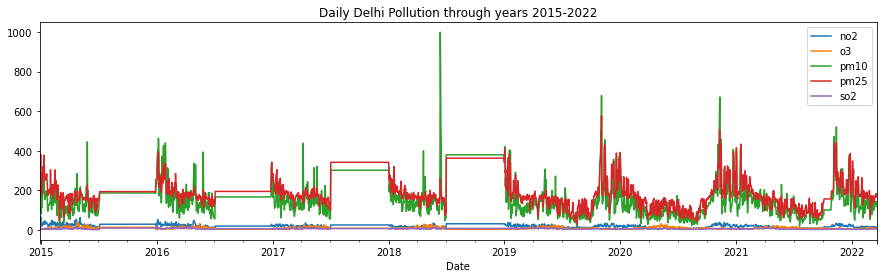

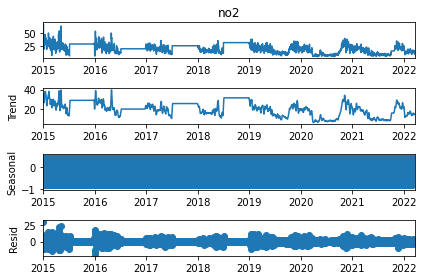

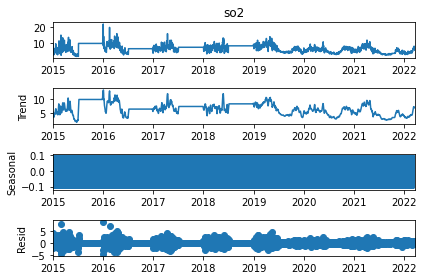

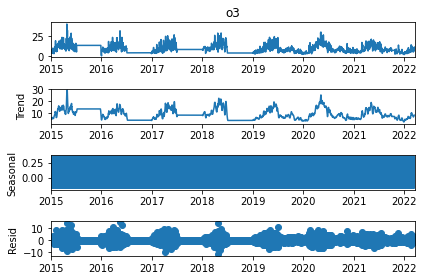

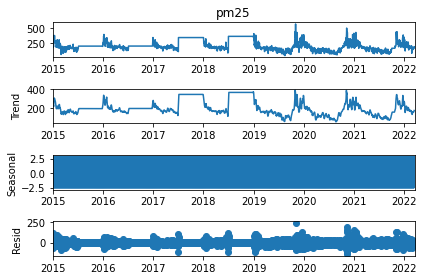

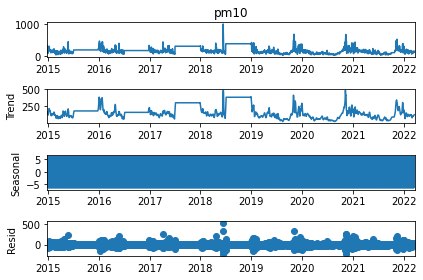

In [44]:
Beijing_Data.resample("1d").mean().bfill().plot(figsize=(15,4), title="Daily Beijing Pollution through years 2020-2022")

model = seasonal_decompose((Beijing_Data.resample('1d').mean().bfill())["no2"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Beijing_Data.resample('1d').mean().bfill())["so2"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Beijing_Data.resample('1d').mean().bfill())["o3"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Beijing_Data.resample('1d').mean().bfill())["pm25"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Beijing_Data.resample('1d').mean().bfill())["pm10"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

Delhi_Data.resample("1d").mean().bfill().plot(figsize=(15,4), title="Daily Delhi Pollution through years 2015-2022")

model = seasonal_decompose((Delhi_Data.resample('1d').mean().bfill())["no2"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Delhi_Data.resample('1d').mean().bfill())["so2"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Delhi_Data.resample('1d').mean().bfill())["o3"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Delhi_Data.resample('1d').mean().bfill())["pm25"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

model = seasonal_decompose((Delhi_Data.resample('1d').mean().bfill())["pm10"])
fig = model.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()


In [45]:
Beijing_train_size = int(len(Beijing_Data) * 0.8)
Beijing_train_X, Beijing_test_X = Beijing_Data[0:Beijing_train_size], Beijing_Data[Beijing_train_size:]
print("Period of train data for Beijing: " + str(Beijing_train_X.index[0]) + " till " +
     str(Beijing_train_X.index[-1]) +"\n")
print("Period of test data for Beijing: " + str(Beijing_test_X.index[0]) + " till " +
     str(Beijing_test_X.index[-1]) +"\n")


Delhi_train_size = int(len(Delhi_Data) * 0.8)
Delhi_train_X, Delhi_test_X = Delhi_Data[0:Delhi_train_size], Delhi_Data[Delhi_train_size:]
print("Period of train data for Delhi: " + str(Delhi_train_X.index[0]) + " till " +
     str(Delhi_train_X.index[-1]) +"\n")
print("Period of test data for Delhi: " + str(Delhi_test_X.index[0]) + " till " +
     str(Delhi_test_X.index[-1]) +"\n")

Period of train data for Beijing: 2014-12-30 00:00:00 till 2021-02-07 00:00:00

Period of test data for Beijing: 2021-02-08 00:00:00 till 2022-03-19 00:00:00

Period of train data for Delhi: 2014-12-29 00:00:00 till 2021-02-10 00:00:00

Period of test data for Delhi: 2021-02-11 00:00:00 till 2022-03-19 00:00:00

